# NYC Taxi data in Winter and Summer

Refer to the [Data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) to learn more about the columns that have been provided.


In [55]:
#Install the pandas library
#!pip install pandas

In [56]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


path = '../../data/taxi.csv'

#Load the csv file into a dataframe
df = pd.read_csv(path)

#Print the dataframe
print(df)


     VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2.0  2019-07-15 16:27:53   2019-07-15 16:44:21              3.0   
1         2.0  2019-07-17 20:26:35   2019-07-17 20:40:09              6.0   
2         2.0  2019-07-06 16:01:08   2019-07-06 16:10:25              1.0   
3         1.0  2019-07-18 22:32:23   2019-07-18 22:35:08              1.0   
4         2.0  2019-07-19 14:54:29   2019-07-19 15:19:08              1.0   
..        ...                  ...                   ...              ...   
195       2.0  2019-01-18 08:42:15   2019-01-18 08:56:57              1.0   
196       1.0  2019-01-19 04:34:45   2019-01-19 04:43:44              1.0   
197       2.0  2019-01-05 10:37:39   2019-01-05 10:42:03              1.0   
198       2.0  2019-01-23 10:36:29   2019-01-23 10:44:34              2.0   
199       2.0  2019-01-30 06:55:58   2019-01-30 07:07:02              5.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocation

# Use the cells below to do your own Exploratory Data Analysis

In [57]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,1.0,N,186,233,1.0,12.0,1.0,0.5,4.08,0.00,0.3,20.38,2.5
1,2.0,2019-07-17 20:26:35,2019-07-17 20:40:09,6.0,1.59,1.0,N,141,161,2.0,10.0,0.5,0.5,0.00,0.00,0.3,13.80,2.5
2,2.0,2019-07-06 16:01:08,2019-07-06 16:10:25,1.0,1.69,1.0,N,246,249,2.0,8.5,0.0,0.5,0.00,0.00,0.3,11.80,2.5
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,1.0,N,229,141,1.0,4.5,3.0,0.5,1.65,0.00,0.3,9.95,2.5
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,1.0,N,237,107,1.0,19.5,0.0,0.5,5.70,0.00,0.3,28.50,2.5
5,2.0,2019-07-28 11:38:08,2019-07-28 11:53:56,1.0,7.60,1.0,N,262,138,1.0,23.0,0.0,0.5,4.86,6.12,0.3,37.28,2.5
6,2.0,2019-07-18 07:15:25,2019-07-18 07:28:23,1.0,2.76,1.0,N,137,236,1.0,11.0,0.0,0.5,2.14,0.00,0.3,16.44,2.5
7,2.0,2019-07-02 21:13:44,2019-07-02 21:21:04,1.0,0.71,1.0,N,170,164,2.0,6.5,0.5,0.5,0.00,0.00,0.3,10.30,2.5
8,2.0,2019-07-12 09:58:59,2019-07-12 10:18:01,1.0,2.15,1.0,N,113,100,1.0,13.0,0.0,0.5,2.50,0.00,0.3,18.80,2.5
9,2.0,2019-07-23 10:05:02,2019-07-23 10:16:42,1.0,1.23,1.0,N,100,137,2.0,9.0,0.0,0.5,0.00,0.00,0.3,12.30,2.5


In [58]:
df.drop(columns=['RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,N,12.0,1.0,4.08,0.0,20.38
1,2.0,2019-07-17 20:26:35,2019-07-17 20:40:09,6.0,1.59,N,10.0,0.5,0.00,0.0,13.80
2,2.0,2019-07-06 16:01:08,2019-07-06 16:10:25,1.0,1.69,N,8.5,0.0,0.00,0.0,11.80
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,N,4.5,3.0,1.65,0.0,9.95
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,N,19.5,0.0,5.70,0.0,28.50
...,...,...,...,...,...,...,...,...,...,...,...
195,2.0,2019-01-18 08:42:15,2019-01-18 08:56:57,1.0,1.18,N,10.0,0.0,2.16,0.0,12.96
196,1.0,2019-01-19 04:34:45,2019-01-19 04:43:44,1.0,2.30,N,9.5,0.5,2.15,0.0,12.95
197,2.0,2019-01-05 10:37:39,2019-01-05 10:42:03,1.0,0.83,N,5.0,0.0,1.16,0.0,6.96
198,2.0,2019-01-23 10:36:29,2019-01-23 10:44:34,2.0,1.12,N,7.0,0.0,0.00,0.0,7.80


In [59]:
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(pd.to_datetime)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime            object
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [60]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,1.0,N,186,233,1.0,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2.0,2019-07-17 20:26:35,2019-07-17 20:40:09,6.0,1.59,1.0,N,141,161,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2.0,2019-07-06 16:01:08,2019-07-06 16:10:25,1.0,1.69,1.0,N,246,249,2.0,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,1.0,N,229,141,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,1.0,N,237,107,1.0,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


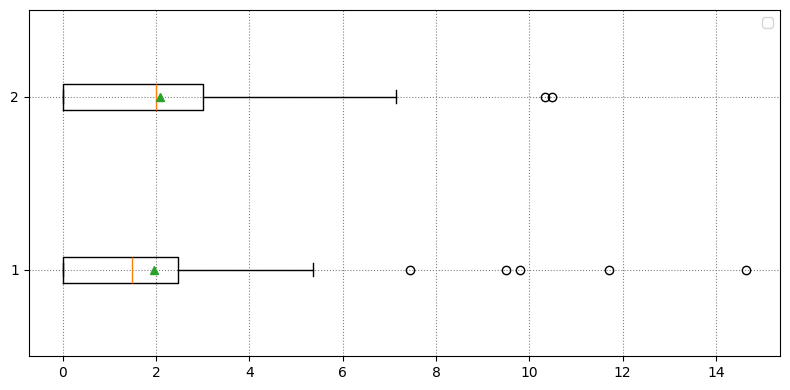

In [61]:
#generate winter and summer dataframes
winter = df[(df['tpep_pickup_datetime'] > pd.to_datetime('2018-12-31')) & (df['tpep_pickup_datetime'] < pd.to_datetime('2019-03-21'))]
summer = df[(df['tpep_pickup_datetime'] > pd.to_datetime('2019-06-20')) & (df['tpep_pickup_datetime'] < pd.to_datetime('2019-09-22'))]

combined = [winter['tip_amount'], summer['tip_amount']]

#generate boxplot for winter and summer on the same plot
plt.figure(figsize=(8,4))
#vert makes the boxplot vertical, showmeans places a green triangle on the mean
plt.boxplot(combined, vert=False, showmeans=True)
#df.boxplot('Height', vert=False, figsize=(10,2), showmeans=True)
plt.grid(color='gray', linestyle='dotted')
# Adding invisible points for creating legends
plt.tight_layout()
plt.show()


## Conclusions
Some factors that may affect the tip amount:
- trip distance
- passenger count
- payment type?
- how much they already paid (fare amount or total amount)

Some columns that may be discarded:
- Vendor IDs
- Ratecode ID
- Store and Forward Flag
- PU and DO IDs
- surcharges, toll amount

We can also tell from the data through a boxplot:
- the boxplots are very similar and there is minimal difference in seasonal tipping.
- This leads to the conclusion that there is likely no evidence of seasonal tipping behavior.